In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
#pd.set_option('display.max_rows', None)

from IPython.display import display, HTML

In [3]:
price_df = pd.read_csv('zillow-yearly-ca.csv').rename(columns={'RegionName': 'county'})
price_df['county'] = price_df['county'].apply(lambda x: x.replace(' County', ''))
price_df['fips_code'] = price_df.apply(lambda x: f'{x.fips_code:05}', axis=1).tolist()
display(price_df)
print(f'Number of counties: {len(price_df.fips_code.unique())}')

,fips_code,county,year,price
0,06001,Alameda,2000,302255.314092
1,06001,Alameda,2001,368098.179928
2,06001,Alameda,2002,393708.303015
3,06001,Alameda,2003,427010.475210
4,06001,Alameda,2004,484363.003599
...,...,...,...,...
1387,06115,Yuba,2019,291275.185476
1388,06115,Yuba,2020,314465.065842
1389,06115,Yuba,2021,371635.057158
1390,06115,Yuba,2022,413854.162305


Number of counties: 58


In [4]:
income_df = pd.read_csv('Income_with_FIPS.csv').rename(columns={'taxable_year': 'year'})
income_df['fips_code'] = income_df.apply(lambda x: f'{x.fp:05}', axis=1).tolist()
income_df = income_df[['fips_code', 'year', 'county', 'population', 'median_income']]
display(income_df)
print(f'Number of counties: {len(income_df.fips_code.unique())}')

,fips_code,year,county,population,median_income
0,06001,1995,Alameda,1347700,28329
1,06003,1995,Alpine,1200,23999
2,06005,1995,Amador,32600,24729
3,06007,1995,Butte,196100,20036
4,06009,1995,Calaveras,36950,23563
...,...,...,...,...,...
1503,06107,2020,Tulare,473482,30151
1504,06109,2020,Tuolumne,55500,39102
1505,06111,2020,Ventura,844545,44494
1506,06113,2020,Yolo,216544,44881


Number of counties: 58


In [5]:
burn_df = pd.read_csv('cleaned_fire_percent.csv').rename(columns={'YEAR_': 'year', 'NAMELSAD': 'county'})
burn_df['county'] = burn_df['county'].apply(lambda x: x.replace(' County', ''))
fips = burn_df.apply(lambda x: f'{x.STATEFP:02}{x.COUNTYFP:03}', axis=1).tolist()
burn_df.insert(0, 'fips_code', fips)
burn_df = burn_df[['fips_code', 'year', 'county', 'total_burn_pyr', 'perc_burn']]
burn_df['year'] = burn_df['year'].astype(int)
display(burn_df)
print(f'Number of counties: {len(burn_df.fips_code.unique())}')

,fips_code,year,county,total_burn_pyr,perc_burn
0,06091,2000,Sierra,6.748577e+04,0.002711
1,06091,2001,Sierra,2.753879e+06,0.110615
2,06091,2003,Sierra,2.429302e+05,0.009758
3,06091,2004,Sierra,1.117228e+06,0.044876
4,06091,2005,Sierra,9.159885e+06,0.367926
...,...,...,...,...,...
1081,06079,2018,San Luis Obispo,5.988013e+06,0.063943
1082,06079,2019,San Luis Obispo,2.196040e+07,0.234503
1083,06079,2020,San Luis Obispo,4.020842e+07,0.429363
1084,06079,2021,San Luis Obispo,8.947344e+05,0.009554


Number of counties: 57


In [51]:
input_df = price_df.merge(income_df, on=['fips_code', 'year', 'county']).merge(burn_df, on=['fips_code', 'year', 'county'])
print(f'Number of counties: {len(input_df.fips_code.unique())}')
display(input_df)
input_df = input_df.drop(columns=['county'])

Number of counties: 55


,fips_code,county,year,price,population,median_income,total_burn_pyr,perc_burn
0,06001,Alameda,2000,302255.314092,1466900,37580,3.052264e+05,0.014358
1,06001,Alameda,2001,368098.179928,1479300,38582,4.758508e+05,0.022384
2,06001,Alameda,2002,393708.303015,1488000,38044,1.230661e+06,0.057891
3,06001,Alameda,2003,427010.475210,1493928,38411,1.642332e+07,0.772567
4,06001,Alameda,2005,585124.011579,1502703,40613,2.040273e+07,0.959761
...,...,...,...,...,...,...,...,...
959,06115,Yuba,2016,223107.534460,76138,32937,2.255334e+06,0.135335
960,06115,Yuba,2017,248179.174297,76767,33537,5.347435e+07,3.208806
961,06115,Yuba,2018,273093.321349,77426,34903,2.818490e+05,0.016913
962,06115,Yuba,2019,291275.185476,79089,36246,9.799734e+05,0.058805


In [52]:
input_df_highrisk = input_df[input_df['perc_burn']>= 5.0]
display(input_df_highrisk)  ## only 944 data points

,fips_code,year,price,population,median_income,total_burn_pyr,perc_burn
49,06007,2008,2.607183e+05,220411,29783,3.430855e+08,7.906132
59,06007,2018,2.943895e+05,227353,35450,6.259434e+08,14.424365
61,06007,2020,3.393465e+05,211216,34586,6.270242e+08,14.449272
75,06009,2015,2.524134e+05,44899,38936,2.720693e+08,10.137126
88,06011,2012,1.420663e+05,21472,29393,2.235772e+08,7.471654
92,06011,2018,2.519779e+05,22260,36818,2.982956e+08,9.968643
110,06015,2008,2.360996e+05,29428,31185,1.738932e+08,5.467990
131,06017,2014,3.715292e+05,182358,47956,2.922056e+08,6.320617
158,06019,2020,2.845776e+05,1008860,32414,9.040893e+08,5.808933
170,06021,2020,2.786945e+05,28822,36489,7.690639e+08,22.398603


In [16]:
hrisk_fips=input_df_highrisk["fips_code"].unique()
hrisk_fips

array(['06007', '06009', '06011', '06015', '06017', '06019', '06021',
       '06033', '06035', '06037', '06039', '06043', '06045', '06053',
       '06055', '06063', '06073', '06083', '06085', '06089', '06093',
       '06095', '06097', '06099', '06103', '06105', '06107', '06109',
       '06111', '06113'], dtype=object)

In [27]:
list(input_df.columns)

[['fips_code',
  'year',
  'price',
  'population',
  'median_income',
  'total_burn_pyr',
  'perc_burn']]

In [32]:

input_df2 =pd.DataFrame(columns=['fips_code', 'year','price','population','median_income','total_burn_pyr','perc_burn'])

for x in hrisk_fips:
    value = input_df[input_df['fips_code'] == x]
    input_df2=pd.concat([input_df2, value])
display(input_df2)

,fips_code,year,price,population,median_income,total_burn_pyr,perc_burn


,fips_code,year,price,population,median_income,total_burn_pyr,perc_burn
42,06007,2000,472684.670327,205400,24513,1.064351e+07,0.245271
43,06007,2001,142262.485428,205800,24847,4.298106e+07,0.990464
44,06007,2002,161422.328889,209700,25332,9.649032e+06,0.222354
45,06007,2003,191717.601947,211140,26205,4.957909e+06,0.114251
46,06007,2004,230315.292549,214123,27087,7.902776e+06,0.182113
...,...,...,...,...,...,...,...
940,06113,2016,381319.388401,216726,41790,2.334860e+07,0.881406
941,06113,2017,417937.097708,219758,42522,9.568923e+06,0.361225
942,06113,2018,449186.654328,222054,44264,2.383705e+08,8.998450
943,06113,2019,464151.357216,221718,44231,8.806695e+06,0.332451


In [33]:
input_df2.tail()

,fips_code,year,price,population,median_income,total_burn_pyr,perc_burn
940,06113,2016,381319.388401,216726,41790,2.334860e+07,0.881406
941,06113,2017,417937.097708,219758,42522,9.568923e+06,0.361225
942,06113,2018,449186.654328,222054,44264,2.383705e+08,8.998450
943,06113,2019,464151.357216,221718,44231,8.806695e+06,0.332451
944,06113,2020,482218.476113,216544,44881,3.087395e+08,11.654871


In [34]:
# Join last 3 year data per row
N = 3
df = input_df2
for lag in range(1, N+1):
    shifted = input_df2.groupby(by=['fips_code']).shift(lag).drop(columns=['year'])
    df = df.join(shifted.rename(columns=lambda x: f"{x}-prev_{lag}"))
df = df.drop(columns=input_df2.columns[3:])
# Remove the first N rows since it doesn't have data from previous N years to make prediction
df = df[~df.isnull().any(axis=1)].reset_index(drop=True)
display(df)

,fips_code,year,price,price-prev_1,population-prev_1,median_income-prev_1,total_burn_pyr-prev_1,perc_burn-prev_1,price-prev_2,population-prev_2,median_income-prev_2,total_burn_pyr-prev_2,perc_burn-prev_2,price-prev_3,population-prev_3,median_income-prev_3,total_burn_pyr-prev_3,perc_burn-prev_3
0,06007,2003,191717.601947,161422.328889,209700,25332,9.649032e+06,0.222354,142262.485428,205800,24847,4.298106e+07,0.990464,472684.670327,205400,24513,1.064351e+07,0.245271
1,06007,2004,230315.292549,191717.601947,211140,26205,4.957909e+06,0.114251,161422.328889,209700,25332,9.649032e+06,0.222354,142262.485428,205800,24847,4.298106e+07,0.990464
2,06007,2006,299181.594322,230315.292549,214123,27087,7.902776e+06,0.182113,191717.601947,211140,26205,4.957909e+06,0.114251,161422.328889,209700,25332,9.649032e+06,0.222354
3,06007,2007,287590.469019,299181.594322,217548,29298,2.186455e+06,0.050385,230315.292549,214123,27087,7.902776e+06,0.182113,191717.601947,211140,26205,4.957909e+06,0.114251
4,06007,2008,260718.260533,287590.469019,218874,29710,8.211981e+06,0.189239,299181.594322,217548,29298,2.186455e+06,0.050385,230315.292549,214123,27087,7.902776e+06,0.182113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,06113,2016,381319.388401,351728.371983,212686,40571,3.917458e+07,1.478835,326712.661817,209863,39705,2.833350e+07,1.069585,246667.502667,205025,38069,3.450371e+06,0.130251
471,06113,2017,417937.097708,381319.388401,216726,41790,2.334860e+07,0.881406,351728.371983,212686,40571,3.917458e+07,1.478835,326712.661817,209863,39705,2.833350e+07,1.069585
472,06113,2018,449186.654328,417937.097708,219758,42522,9.568923e+06,0.361225,381319.388401,216726,41790,2.334860e+07,0.881406,351728.371983,212686,40571,3.917458e+07,1.478835
473,06113,2019,464151.357216,449186.654328,222054,44264,2.383705e+08,8.998450,417937.097708,219758,42522,9.568923e+06,0.361225,381319.388401,216726,41790,2.334860e+07,0.881406


RMSE: 2472619495.93


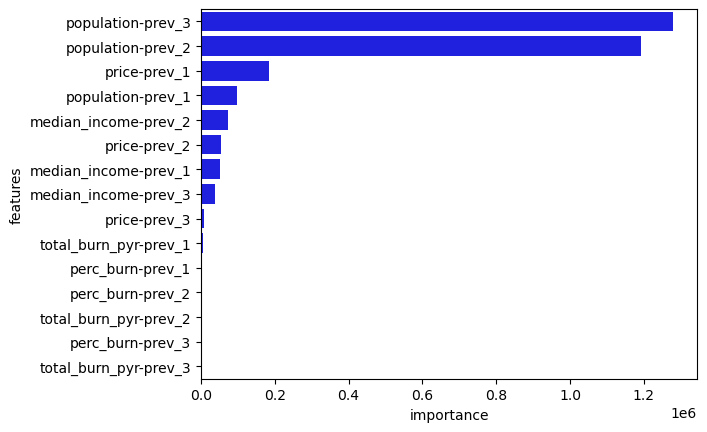

In [43]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error


feat_cols = df.columns[3:]
X = df[feat_cols].values
y = df.price

# Random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print(f'Number of features: {len(feat_cols)}')
print(f'Train: {len(X_train)}')
print(f'Test: {len(X_test)}')

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_test_predict = model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_test_predict)
#rmsle = mean_squared_log_error(y_test, y_test_predict)
print(f'RMSE: {rmse:.2f}')
#print(f'RMSLE: {rmsle:.2f}')

lg_importances = pd.DataFrame(data={
    'features': feat_cols,
    'importance': abs(model.coef_)
})
lg_importances = lg_importances.sort_values(by='importance', ascending=False)
#display(lg_importances)

sns.barplot(x="importance", y="features", data=lg_importances, label="Feature Importance", color="b")
plt.show()

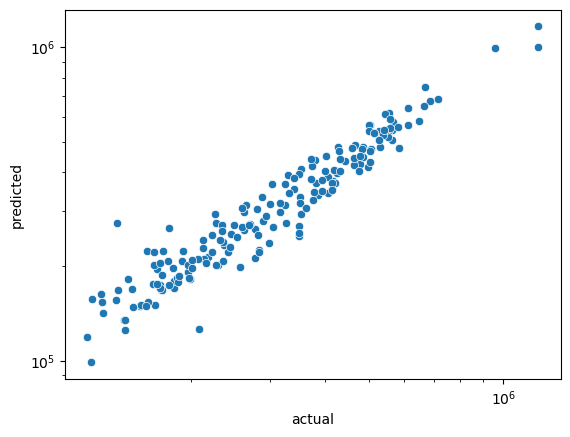

In [44]:
# Plot actual vs. predicted in log-scale
res_df = pd.DataFrame(np.vstack([y_test, y_test_predict]).T, columns=['actual', 'predicted'])
sns.scatterplot(data=res_df, x='actual', y='predicted')
plt.xscale('log')
plt.yscale('log')

,fips_code,year,price,population,median_income,total_burn_pyr,perc_burn
59,06007,2018,2.943895e+05,227353,35450,6.259434e+08,14.424365
61,06007,2020,3.393465e+05,211216,34586,6.270242e+08,14.449272
75,06009,2015,2.524134e+05,44899,38936,2.720693e+08,10.137126
170,06021,2020,2.786945e+05,28822,36489,7.690639e+08,22.398603
263,06033,2015,1.711433e+05,65180,29955,5.793476e+08,16.840176
266,06033,2018,2.347913e+05,65020,32486,1.361587e+09,39.577911
330,06039,2020,2.875481e+05,156519,31609,7.629358e+08,13.686166
362,06043,2017,2.566610e+05,17992,35162,3.971627e+08,10.488127
363,06043,2018,2.738737e+05,17904,36600,3.989937e+08,10.536480
451,06053,2008,4.693034e+05,429198,31611,1.039839e+09,10.648168


,fips_code,year,price,price-prev_1,population-prev_1,median_income-prev_1,total_burn_pyr-prev_1,perc_burn-prev_1,price-prev_2,population-prev_2,median_income-prev_2,total_burn_pyr-prev_2,perc_burn-prev_2,price-prev_3,population-prev_3,median_income-prev_3,total_burn_pyr-prev_3,perc_burn-prev_3
0,06007,2003,191717.601947,161422.328889,209700,25332,9.649032e+06,0.222354,142262.485428,205800,24847,4.298106e+07,0.990464,472684.670327,205400,24513,1.064351e+07,0.245271
1,06007,2004,230315.292549,191717.601947,211140,26205,4.957909e+06,0.114251,161422.328889,209700,25332,9.649032e+06,0.222354,142262.485428,205800,24847,4.298106e+07,0.990464
2,06007,2006,299181.594322,230315.292549,214123,27087,7.902776e+06,0.182113,191717.601947,211140,26205,4.957909e+06,0.114251,161422.328889,209700,25332,9.649032e+06,0.222354
3,06007,2007,287590.469019,299181.594322,217548,29298,2.186455e+06,0.050385,230315.292549,214123,27087,7.902776e+06,0.182113,191717.601947,211140,26205,4.957909e+06,0.114251
4,06007,2008,260718.260533,287590.469019,218874,29710,8.211981e+06,0.189239,299181.594322,217548,29298,2.186455e+06,0.050385,230315.292549,214123,27087,7.902776e+06,0.182113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,06113,2016,381319.388401,351728.371983,212686,40571,3.917458e+07,1.478835,326712.661817,209863,39705,2.833350e+07,1.069585,246667.502667,205025,38069,3.450371e+06,0.130251
284,06113,2017,417937.097708,381319.388401,216726,41790,2.334860e+07,0.881406,351728.371983,212686,40571,3.917458e+07,1.478835,326712.661817,209863,39705,2.833350e+07,1.069585
285,06113,2018,449186.654328,417937.097708,219758,42522,9.568923e+06,0.361225,381319.388401,216726,41790,2.334860e+07,0.881406,351728.371983,212686,40571,3.917458e+07,1.478835
286,06113,2019,464151.357216,449186.654328,222054,44264,2.383705e+08,8.998450,417937.097708,219758,42522,9.568923e+06,0.361225,381319.388401,216726,41790,2.334860e+07,0.881406


Number of features: 15
Train: 172
Test: 116
RMSE: 2876951405.35


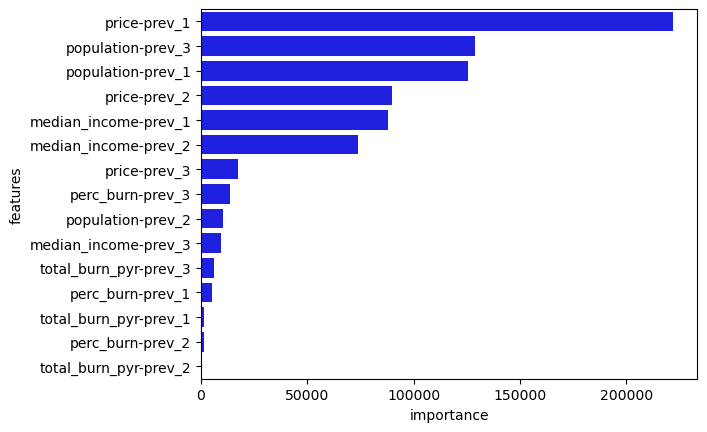

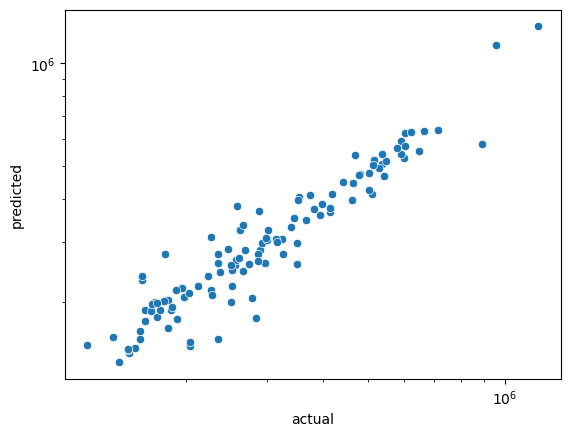

In [54]:
## looking at counties with >10% burn only
input_df_highrisk = input_df[input_df['perc_burn']>= 10]
display(input_df_highrisk)  ## only 944 data points

hrisk_fips=input_df_highrisk["fips_code"].unique()
input_df2 =pd.DataFrame(columns=['fips_code', 'year','price','population','median_income','total_burn_pyr','perc_burn'])

for x in hrisk_fips:
    value = input_df[input_df['fips_code'] == x]
    input_df2=pd.concat([input_df2, value])

# Join last 3 year data per row
N = 3
df = input_df2
for lag in range(1, N+1):
    shifted = input_df2.groupby(by=['fips_code']).shift(lag).drop(columns=['year'])
    df = df.join(shifted.rename(columns=lambda x: f"{x}-prev_{lag}"))
df = df.drop(columns=input_df2.columns[3:])
# Remove the first N rows since it doesn't have data from previous N years to make prediction
df = df[~df.isnull().any(axis=1)].reset_index(drop=True)
display(df)


feat_cols = df.columns[3:]
X = df[feat_cols].values
y = df.price

# Random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print(f'Number of features: {len(feat_cols)}')
print(f'Train: {len(X_train)}')
print(f'Test: {len(X_test)}')

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_test_predict = model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_test_predict)
#rmsle = mean_squared_log_error(y_test, y_test_predict)
print(f'RMSE: {rmse:.2f}')
#print(f'RMSLE: {rmsle:.2f}')

lg_importances = pd.DataFrame(data={
    'features': feat_cols,
    'importance': abs(model.coef_)
})
lg_importances = lg_importances.sort_values(by='importance', ascending=False)
#display(lg_importances)

sns.barplot(x="importance", y="features", data=lg_importances, label="Feature Importance", color="b")
plt.show()

# Plot actual vs. predicted in log-scale
res_df = pd.DataFrame(np.vstack([y_test, y_test_predict]).T, columns=['actual', 'predicted'])
sns.scatterplot(data=res_df, x='actual', y='predicted')
plt.xscale('log')
plt.yscale('log')

<Axes: xlabel='year', ylabel='perc_burn'>

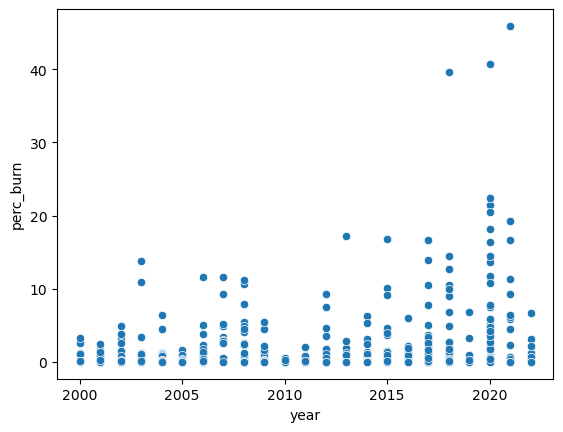

In [47]:
sns.scatterplot(y=burn_df['perc_burn'], x=burn_df['year'])

Number of features: 15
Train: 84
Test: 57
RMSE: 150186137.73
RMSLE: 0.00


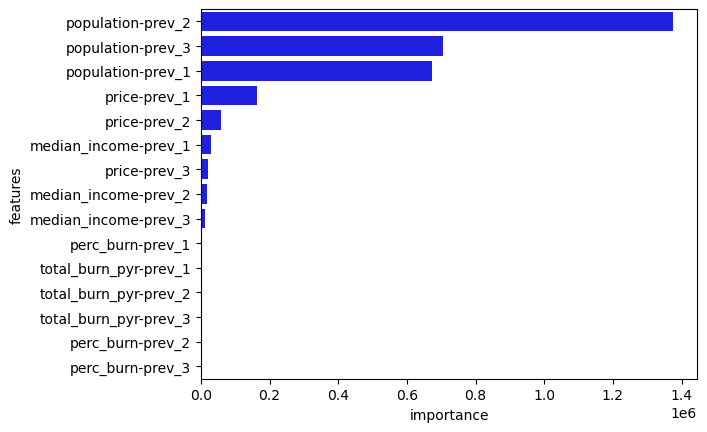

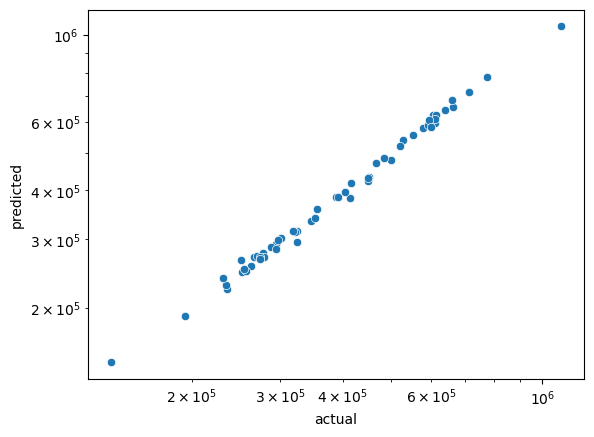

In [55]:
### confining to the more recent past, post 2015

input_df2= input_df[input_df['year']>= 2015]


# Join last 3 year data per row
N = 3
df = input_df2
for lag in range(1, N+1):
    shifted = input_df2.groupby(by=['fips_code']).shift(lag).drop(columns=['year'])
    df = df.join(shifted.rename(columns=lambda x: f"{x}-prev_{lag}"))
df = df.drop(columns=input_df2.columns[3:])
# Remove the first N rows since it doesn't have data from previous N years to make prediction
df = df[~df.isnull().any(axis=1)].reset_index(drop=True)



feat_cols = df.columns[3:]
X = df[feat_cols].values
y = df.price

# Random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print(f'Number of features: {len(feat_cols)}')
print(f'Train: {len(X_train)}')
print(f'Test: {len(X_test)}')

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_test_predict = model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_test_predict)
rmsle = mean_squared_log_error(y_test, y_test_predict)
print(f'RMSE: {rmse:.2f}')
print(f'RMSLE: {rmsle:.2f}')

lg_importances = pd.DataFrame(data={
    'features': feat_cols,
    'importance': abs(model.coef_)
})
lg_importances = lg_importances.sort_values(by='importance', ascending=False)
#display(lg_importances)

sns.barplot(x="importance", y="features", data=lg_importances, label="Feature Importance", color="b")
plt.show()

# Plot actual vs. predicted in log-scale
res_df = pd.DataFrame(np.vstack([y_test, y_test_predict]).T, columns=['actual', 'predicted'])
sns.scatterplot(data=res_df, x='actual', y='predicted')
plt.xscale('log')
plt.yscale('log')

Number of features: 15
Train: 30
Test: 21
RMSE: 3013082503.60
RMSLE: 0.01


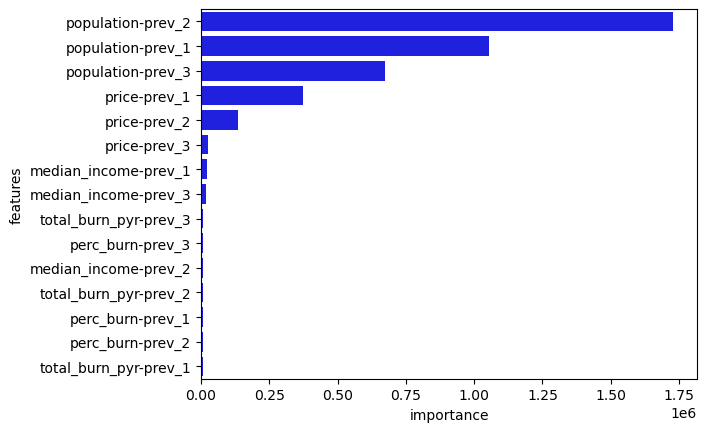

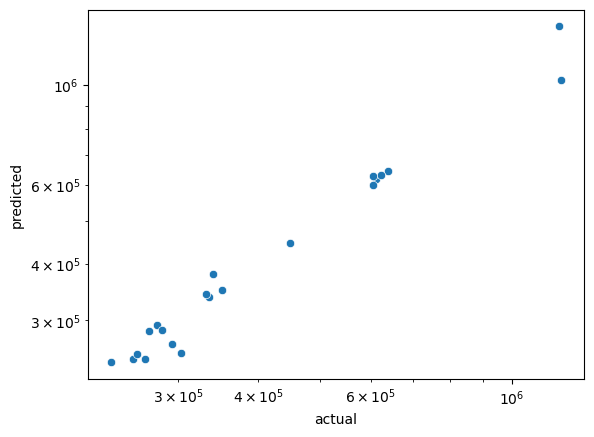

In [56]:
###Post 2015 & only in >10% burn counties

input_df_highrisk = input_df[input_df['perc_burn']>= 10]


hrisk_fips=input_df_highrisk["fips_code"].unique()
input_df2 =pd.DataFrame(columns=['fips_code', 'year','price','population','median_income','total_burn_pyr','perc_burn'])

for x in hrisk_fips:
    value = input_df[input_df['fips_code'] == x]
    input_df2=pd.concat([input_df2, value])

input_df3= input_df2[input_df2['year']>= 2015]

# Join last 3 year data per row
N = 3
df = input_df3
for lag in range(1, N+1):
    shifted = input_df3.groupby(by=['fips_code']).shift(lag).drop(columns=['year'])
    df = df.join(shifted.rename(columns=lambda x: f"{x}-prev_{lag}"))
df = df.drop(columns=input_df3.columns[3:])
# Remove the first N rows since it doesn't have data from previous N years to make prediction
df = df[~df.isnull().any(axis=1)].reset_index(drop=True)



feat_cols = df.columns[3:]
X = df[feat_cols].values
y = df.price

# Random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print(f'Number of features: {len(feat_cols)}')
print(f'Train: {len(X_train)}')
print(f'Test: {len(X_test)}')

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_test_predict = model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_test_predict)
rmsle = mean_squared_log_error(y_test, y_test_predict)
print(f'RMSE: {rmse:.2f}')
print(f'RMSLE: {rmsle:.2f}')

lg_importances = pd.DataFrame(data={
    'features': feat_cols,
    'importance': abs(model.coef_)
})
lg_importances = lg_importances.sort_values(by='importance', ascending=False)
#display(lg_importances)

sns.barplot(x="importance", y="features", data=lg_importances, label="Feature Importance", color="b")
plt.show()

# Plot actual vs. predicted in log-scale
res_df = pd.DataFrame(np.vstack([y_test, y_test_predict]).T, columns=['actual', 'predicted'])
sns.scatterplot(data=res_df, x='actual', y='predicted')
plt.xscale('log')
plt.yscale('log')


##not enugh data